In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from sklearn.model_selection import train_test_split


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA



In [52]:
##import machine learning models

# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

# Importing Decision Tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Importing Random Forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


In [53]:
daatasources={
    source.replace(".zip",""):source 
    for source in os.listdir("/Users/eduardomartinezacha/Desktop/coding/python/final material/project") 
    if source.endswith(".zip")}
daatasources


{'de-shareprices-daily': 'de-shareprices-daily.zip'}

In [54]:
datasets={}

for key, values in daatasources.items():
    datasets[key]= pd.read_csv(f"/Users/eduardomartinezacha/Desktop/coding/python/final material/project/{values}",sep=';')

In [55]:
import pandas as pd

datasets = {}

for key, values in daatasources.items():
    datasets[key] = pd.read_csv(f"/Users/eduardomartinezacha/Desktop/coding/python/final material/project/{values}", sep=';')

# Combine all DataFrames into one
df = pd.concat(datasets.values(), ignore_index=True)

df['Price_Changes']= df['Open']- df['Close']
df['Price_Changes']

0        0.58
1        1.04
2       -0.43
3       -1.73
4       -1.92
         ... 
39091   -2.88
39092    2.82
39093    2.33
39094    0.00
39095   -0.27
Name: Price_Changes, Length: 39096, dtype: float64

In [56]:
df=pd.DataFrame(df)

In [57]:
df

,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding,Price_Changes
0,1COV.DE,854465,2019-04-08,59.88,60.11,58.96,59.30,45.78,988273,NaN,182704602.0,0.58
1,1COV.DE,854465,2019-04-09,59.26,59.59,58.11,58.22,44.95,947739,NaN,182704602.0,1.04
2,1COV.DE,854465,2019-04-10,58.59,59.70,58.48,59.02,45.57,1011537,NaN,182704602.0,-0.43
3,1COV.DE,854465,2019-04-11,58.78,60.81,58.46,60.51,46.72,1415119,NaN,182704602.0,-1.73
4,1COV.DE,854465,2019-04-12,60.70,63.14,59.68,62.62,48.35,2215258,NaN,182704602.0,-1.92
...,...,...,...,...,...,...,...,...,...,...,...,...
39091,VOW.DE,858327,2024-03-04,151.77,155.35,151.72,154.65,144.63,55049,NaN,501295263.0,-2.88
39092,VOW.DE,858327,2024-03-05,153.38,153.49,148.23,150.56,140.81,53480,NaN,501295263.0,2.82
39093,VOW.DE,858327,2024-03-06,150.56,151.05,147.63,148.23,138.63,47456,NaN,501295263.0,2.33
39094,VOW.DE,858327,2024-03-07,147.02,147.57,145.17,147.02,137.51,38560,NaN,501295263.0,0.00


In [58]:
vals=['VOW.DE','MBG.DE','BMW.DE','DRI.DE','DTE.DE']
df=df[df['Ticker'].isin(vals)]
df['Date']=pd.to_datetime(df['Date'])
df['log_returns']= np.log(df['Close']/df['Close'].shift(1)).dropna()
df['log_returns']

/var/folders/1g/fkw2cbkx20bgcrcc0b6yr38w0000gn/T/ipykernel_50072/4217427957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date'])
/var/folders/1g/fkw2cbkx20bgcrcc0b6yr38w0000gn/T/ipykernel_50072/4217427957.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_returns']= np.log(df['Close']/df['Close'].shift(1)).dropna()


7518          NaN
7519    -0.004235
7520     0.000849
7521     0.003025
7522     0.029050
           ...   
39091    0.021768
39092   -0.026803
39093   -0.015597
39094   -0.008196
39095   -0.000136
Name: log_returns, Length: 5599, dtype: float64

In [62]:
df['Ticker'].unique()
df['log_returns']= np.log(df['Close']/df['Close'].shift(1)).dropna()
df['log_returns']=df['log_returns'].dropna()

/var/folders/1g/fkw2cbkx20bgcrcc0b6yr38w0000gn/T/ipykernel_50072/284432820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_returns']= np.log(df['Close']/df['Close'].shift(1)).dropna()
/var/folders/1g/fkw2cbkx20bgcrcc0b6yr38w0000gn/T/ipykernel_50072/284432820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_returns']=df['log_returns'].dropna()


In [63]:
portfolio=df.groupby('Date').agg({'Close': 'sum'})
portfolio.columns

Index(['Close'], dtype='object')

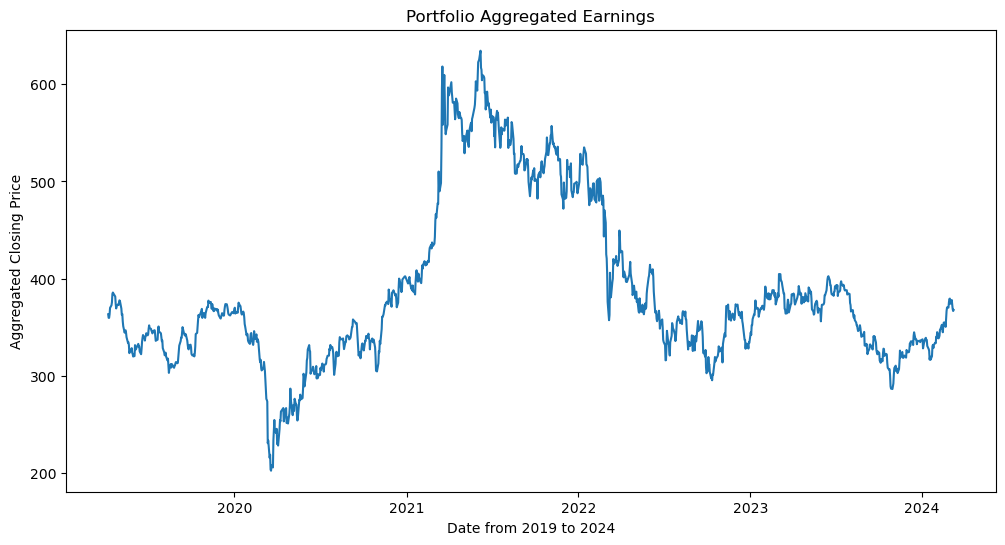

In [64]:
plt.figure(figsize=(12,6))
plt.plot(portfolio.index, portfolio['Close'], linestyle='-')
plt.xlabel('Date from 2019 to 2024')
plt.ylabel('Aggregated Closing Price')
plt.title('Portfolio Aggregated Earnings')
plt.show()


In [65]:
df.isna().sum()

Ticker                   0
SimFinId                 0
Date                     0
Open                     0
High                     0
Low                      0
Close                    0
Adj. Close               0
Volume                   0
Dividend              5574
Shares Outstanding     587
Price_Changes            0
log_returns              1
dtype: int64

In [66]:
bmw=df[df['Ticker']=='BMW.DE']
dri=df[df['Ticker']=='DRI.DE']
dte=df[df['Ticker']=='DTE.DE']
mbg=df[df['Ticker']=='MBG.DE']
vow=df[df['Ticker']=='VOW.DE']


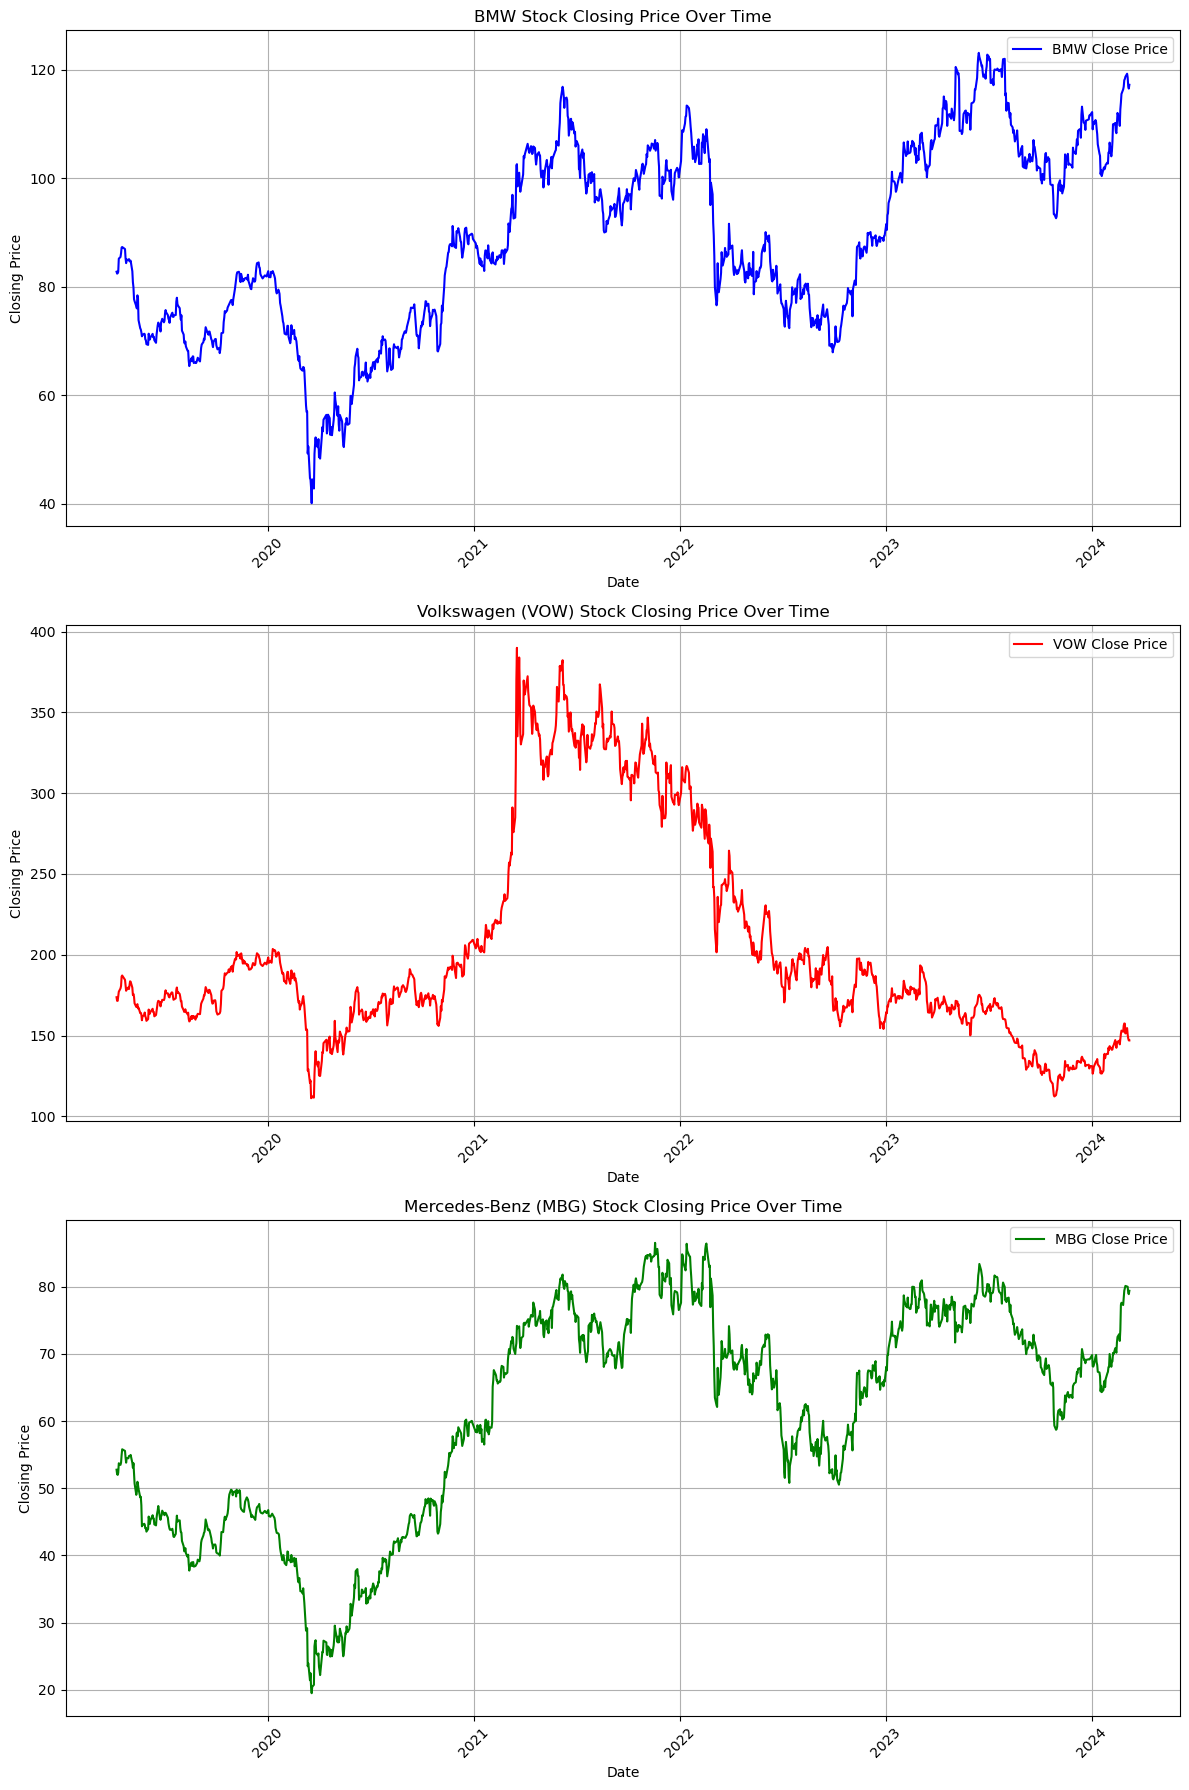

In [43]:
import matplotlib.pyplot as plt

# Create subplots: 3 rows, 1 column
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# BMW Stock Closing Price
axes[0].plot(bmw['Date'], bmw['Close'], linestyle='-', label='BMW Close Price', color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Closing Price')
axes[0].set_title('BMW Stock Closing Price Over Time')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Volkswagen (VOW) Stock Closing Price
axes[1].plot(vow['Date'], vow['Close'], linestyle='-', label='VOW Close Price', color='red')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Closing Price')
axes[1].set_title('Volkswagen (VOW) Stock Closing Price Over Time')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Mercedes-Benz (MBG) Stock Closing Price
axes[2].plot(mbg['Date'], mbg['Close'], linestyle='-', label='MBG Close Price', color='green')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Closing Price')
axes[2].set_title('Mercedes-Benz (MBG) Stock Closing Price Over Time')
axes[2].legend()
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


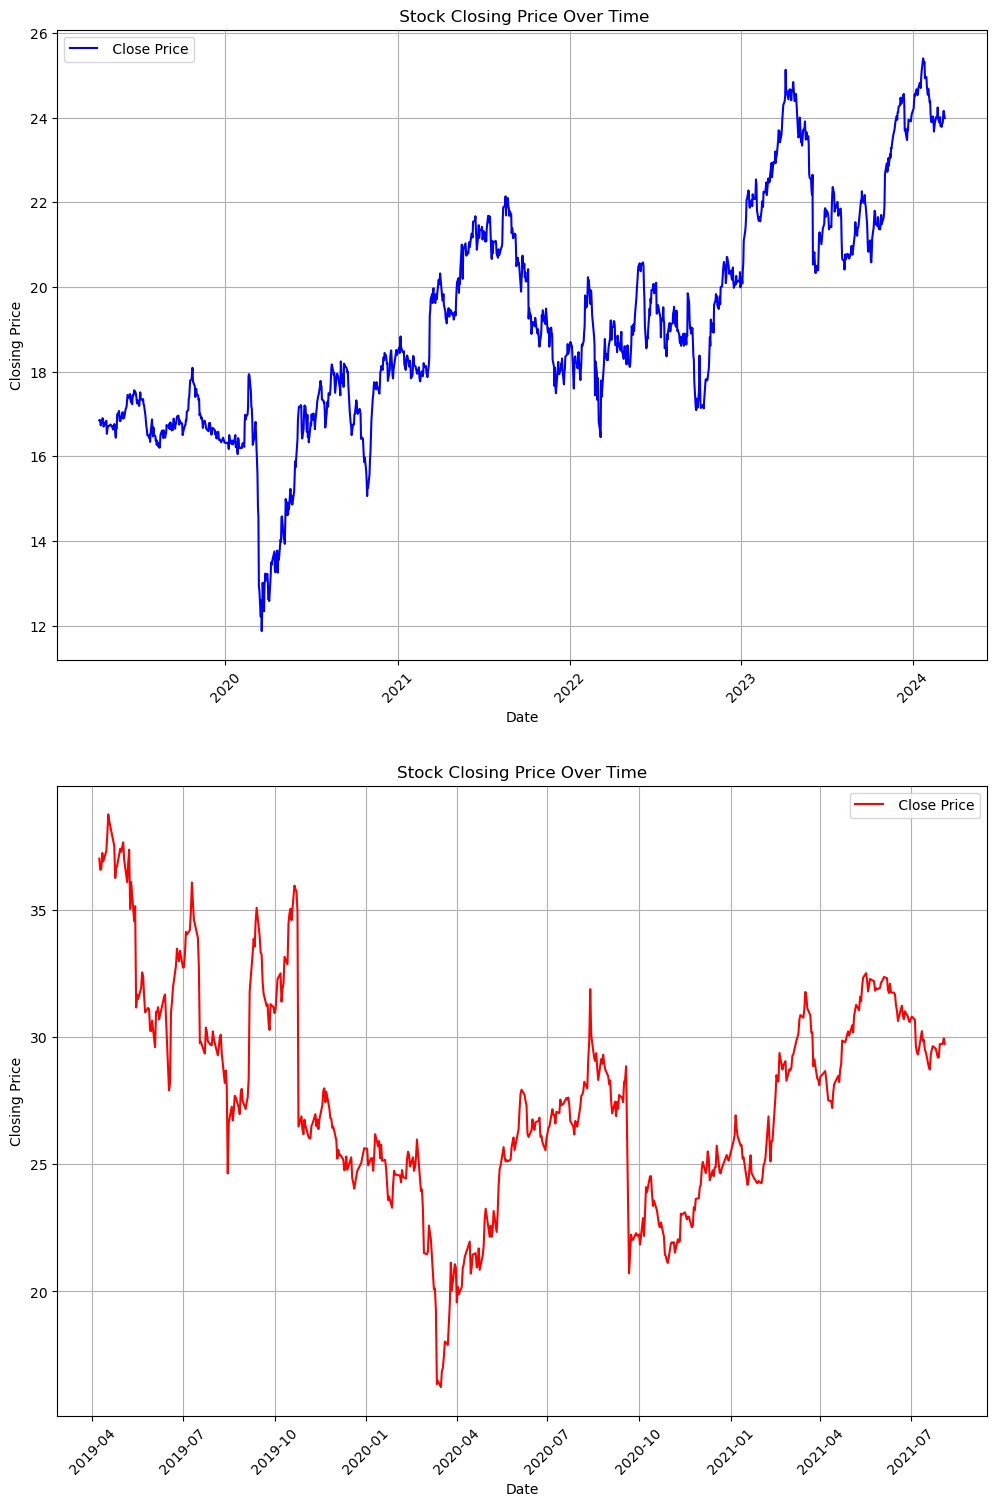

In [67]:
import matplotlib.pyplot as plt

# Create subplots: 3 rows, 1 column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 18))

# BMW Stock Closing Price
axes[0].plot(dte['Date'], dte['Close'], linestyle='-', label=' Close Price', color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Closing Price')
axes[0].set_title(' Stock Closing Price Over Time')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Volkswagen (VOW) Stock Closing Price
axes[1].plot(dri['Date'], dri['Close'], linestyle='-', label=' Close Price', color='red')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Closing Price')
axes[1].set_title('Stock Closing Price Over Time')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

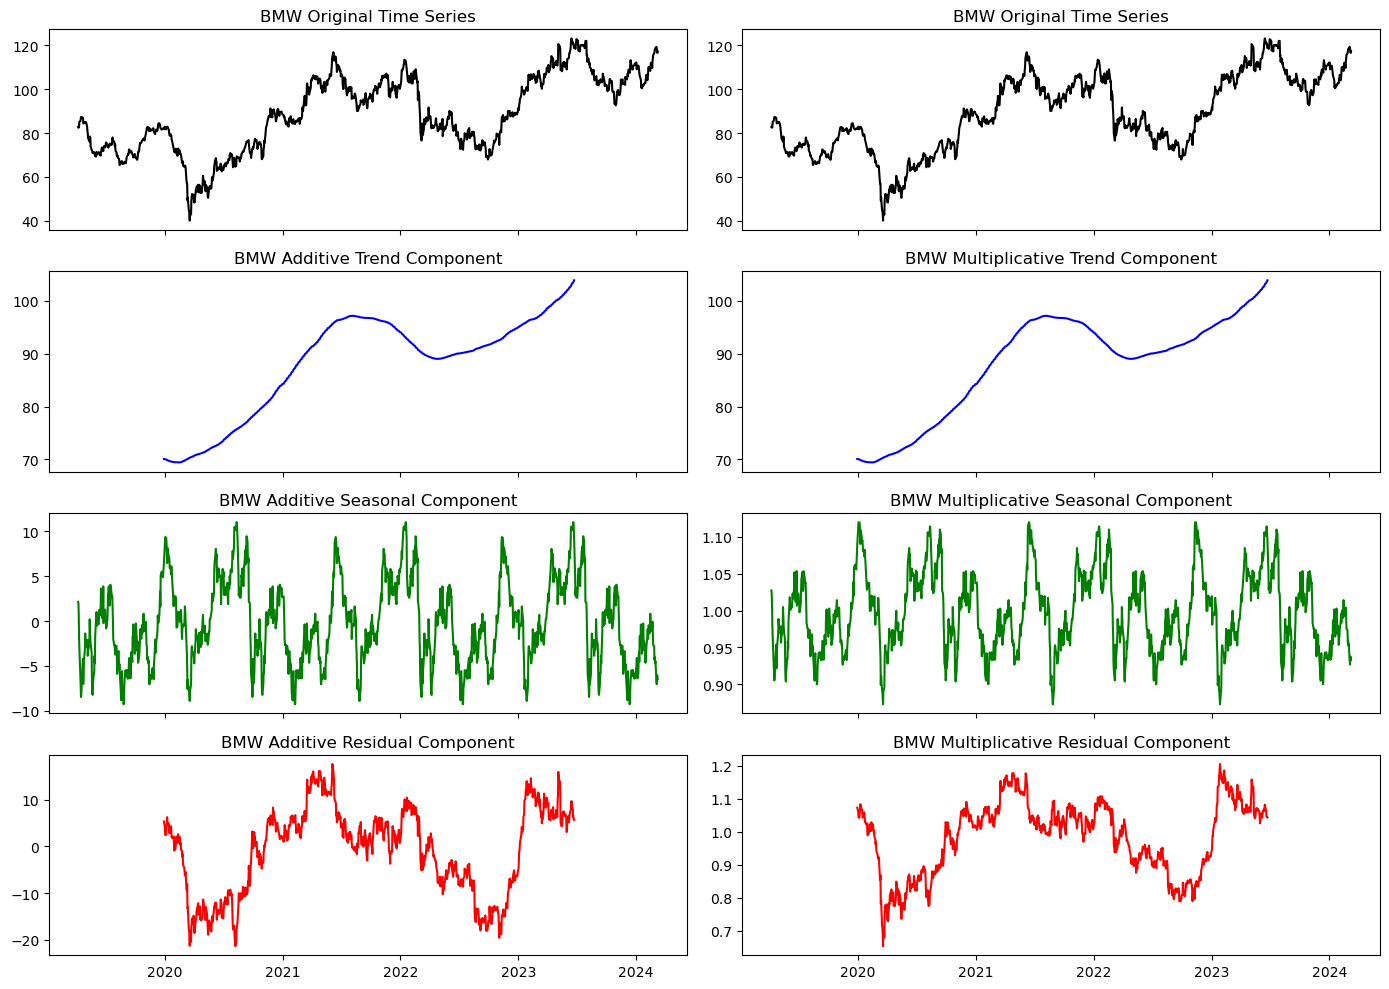

In [68]:
##additive and multiplicative for each vehicle company
# ---  Apply Additive and Multiplicative Decomposition ---
additive_decomposition = seasonal_decompose(bmw["Close"], model="additive", period=365)
multiplicative_decomposition = seasonal_decompose(bmw["Close"], model="multiplicative", period=365)

# Plot both decompositions side by side
fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)

# Additive Decomposition Plots
axes[0, 0].plot(bmw['Date'], bmw["Close"], color="black")
axes[0, 0].set_title("BMW Original Time Series")

axes[1, 0].plot(bmw['Date'], additive_decomposition.trend, color="blue")
axes[1, 0].set_title("BMW Additive Trend Component")

axes[2, 0].plot(bmw['Date'], additive_decomposition.seasonal, color="green")
axes[2, 0].set_title("BMW Additive Seasonal Component")

axes[3, 0].plot(bmw['Date'], additive_decomposition.resid, color="red")
axes[3, 0].set_title("BMW Additive Residual Component")

# Multiplicative Decomposition Plots
axes[0, 1].plot(bmw['Date'], bmw["Close"], color="black")
axes[0, 1].set_title("BMW Original Time Series")

axes[1, 1].plot(bmw['Date'], multiplicative_decomposition.trend, color="blue")
axes[1, 1].set_title("BMW Multiplicative Trend Component")

axes[2, 1].plot(bmw['Date'], multiplicative_decomposition.seasonal, color="green")
axes[2, 1].set_title("BMW Multiplicative Seasonal Component")

axes[3, 1].plot(bmw['Date'], multiplicative_decomposition.resid, color="red")
axes[3, 1].set_title("BMW Multiplicative Residual Component")

plt.tight_layout()
plt.show()

In [74]:
bmw=bmw[bmw['log_returns'].notnull()]

/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF plot for Closing Price in log format')

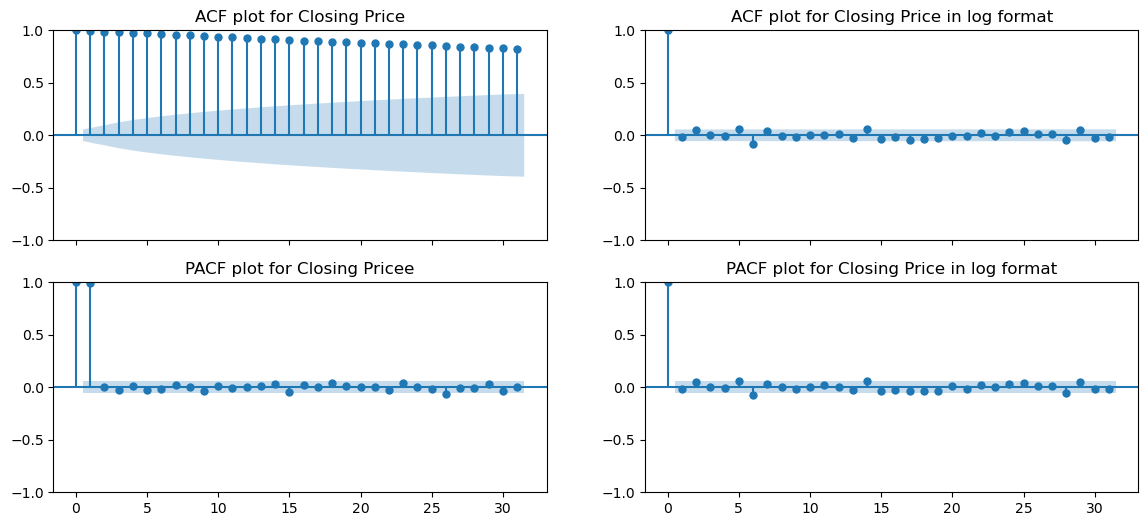

In [75]:
fig, axes=plt.subplots(2,2,figsize=(14,6),sharex=True)
plot_acf( bmw['Close'],ax=axes[0,0])
axes[0,0].set_title('ACF plot for Closing Price')
plot_pacf(bmw['Close'], ax=axes[1, 0])

axes[1,0].set_title('PACF plot for Closing Pricee')
plot_acf( bmw['log_returns'],ax=axes[0,1])
axes[0,1].set_title('ACF plot for Closing Price in log format')
plot_pacf(bmw['log_returns'], ax=axes[1, 1])

axes[1,1].set_title('PACF plot for Closing Price in log format')

- volkswaggen

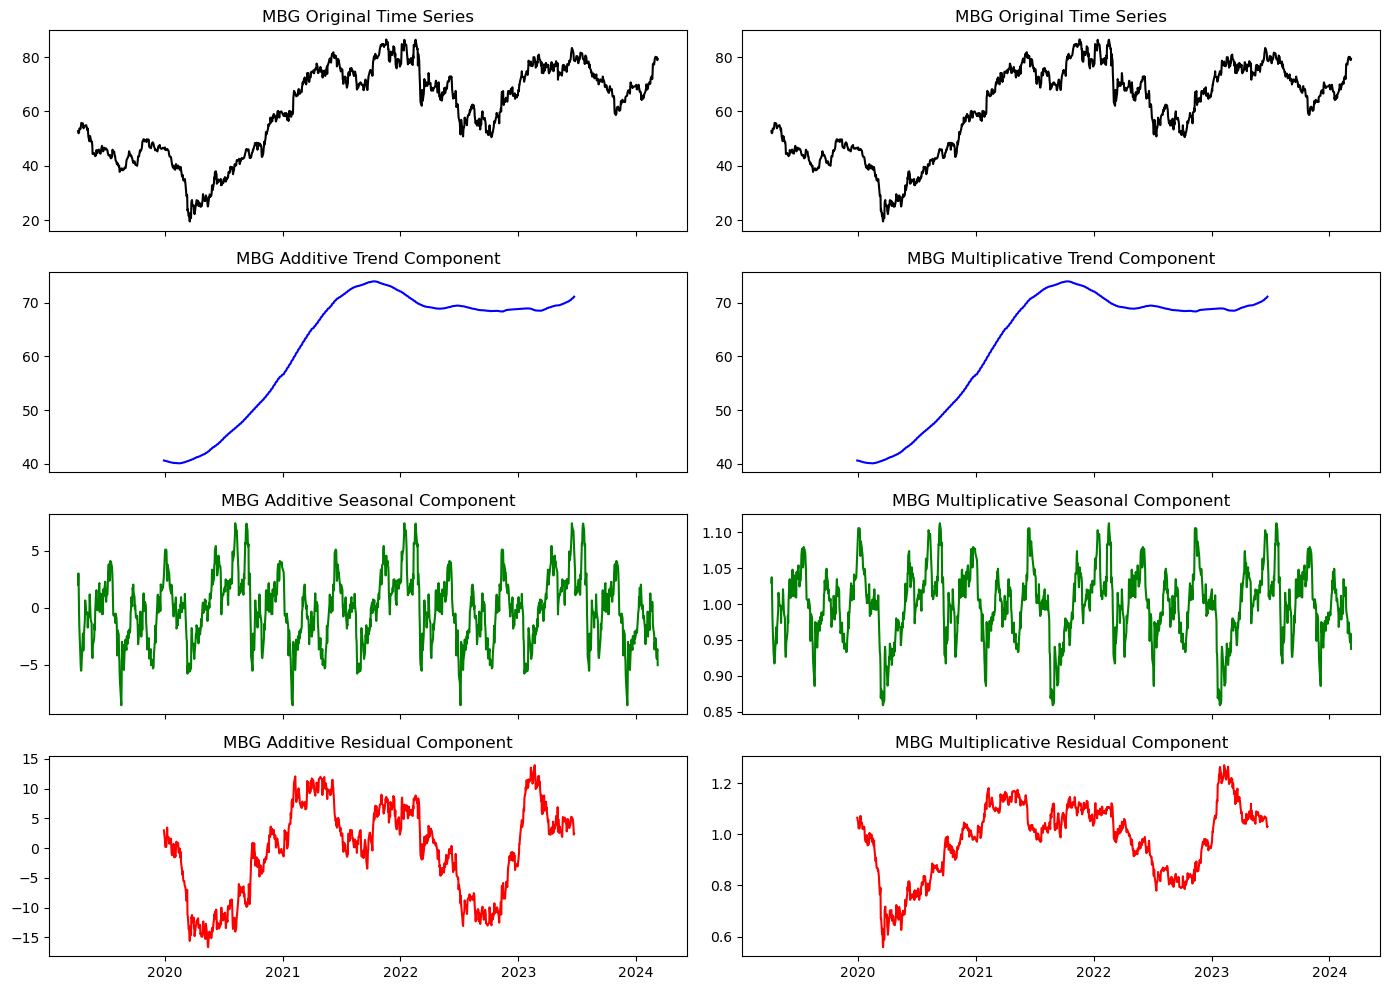

In [27]:

##additive and multiplicative for each vehicle company
# ---  Apply Additive and Multiplicative Decomposition ---
additive_decomposition = seasonal_decompose(mbg["Close"], model="additive", period=365)
multiplicative_decomposition = seasonal_decompose(mbg["Close"], model="multiplicative", period=365)

# Plot both decompositions side by side
fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)

# Additive Decomposition Plots
axes[0, 0].plot(mbg['Date'], mbg["Close"], color="black")
axes[0, 0].set_title("MBG Original Time Series")

axes[1, 0].plot(mbg['Date'], additive_decomposition.trend, color="blue")
axes[1, 0].set_title("MBG Additive Trend Component")

axes[2, 0].plot(mbg['Date'], additive_decomposition.seasonal, color="green")
axes[2, 0].set_title("MBG Additive Seasonal Component")

axes[3, 0].plot(mbg['Date'], additive_decomposition.resid, color="red")
axes[3, 0].set_title("MBG Additive Residual Component")

# Multiplicative Decomposition Plots
axes[0, 1].plot(mbg['Date'], mbg["Close"], color="black")
axes[0, 1].set_title("MBG Original Time Series")

axes[1, 1].plot(mbg['Date'], multiplicative_decomposition.trend, color="blue")
axes[1, 1].set_title("MBG Multiplicative Trend Component")

axes[2, 1].plot(mbg['Date'], multiplicative_decomposition.seasonal, color="green")
axes[2, 1].set_title("MBG Multiplicative Seasonal Component")

axes[3, 1].plot(mbg['Date'], multiplicative_decomposition.resid, color="red")
axes[3, 1].set_title("MBG Multiplicative Residual Component")

plt.tight_layout()
plt.show()


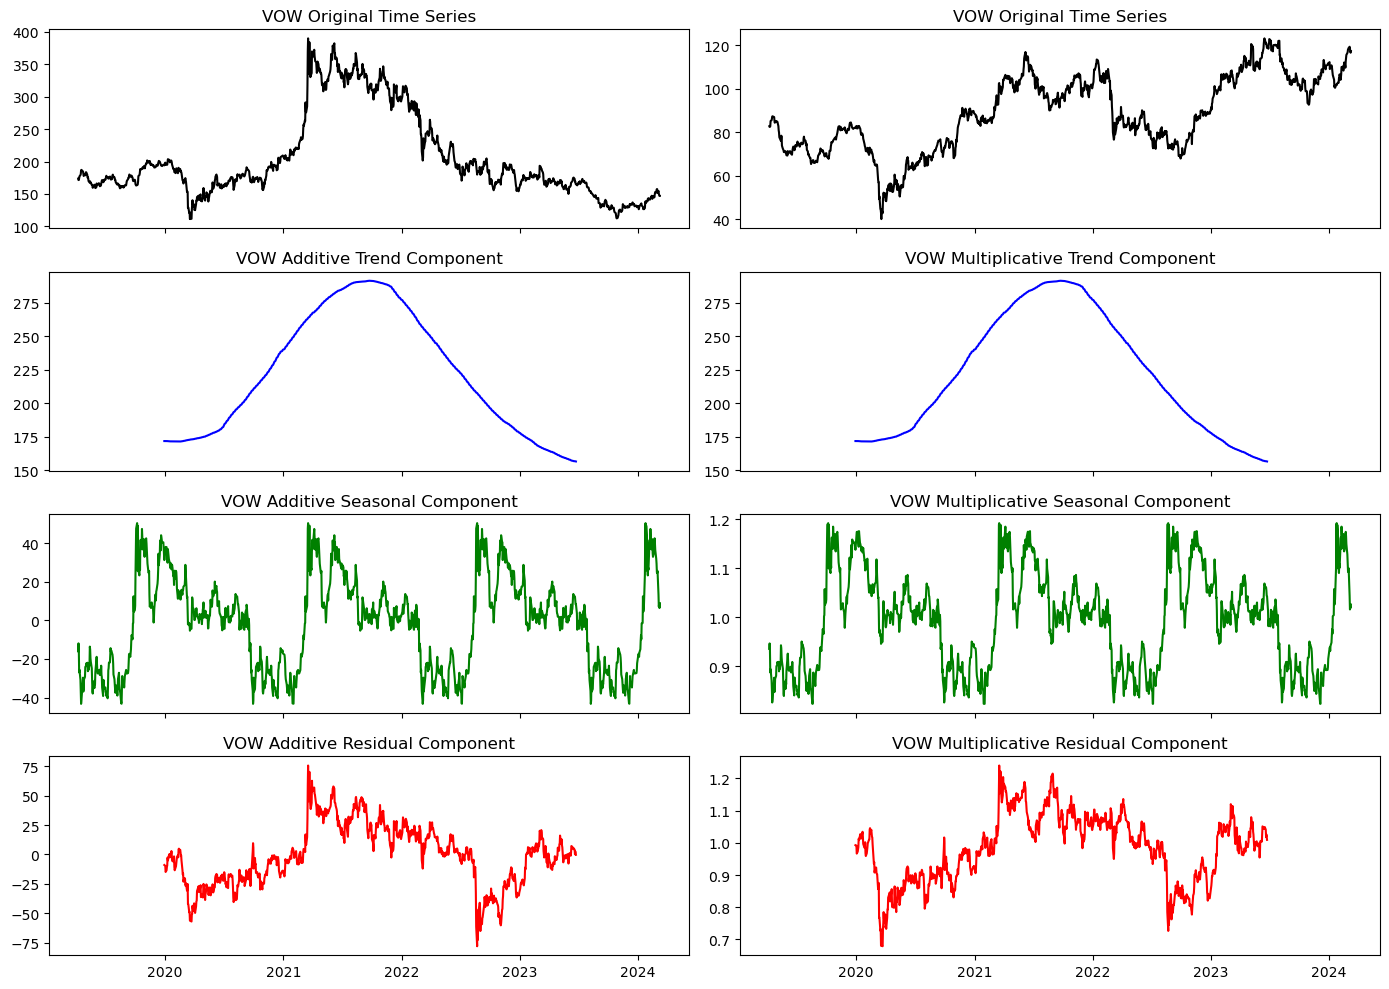

In [28]:

##additive and multiplicative for each vehicle company
# ---  Apply Additive and Multiplicative Decomposition ---
additive_decomposition = seasonal_decompose(vow["Close"], model="additive", period=365)
multiplicative_decomposition = seasonal_decompose(vow["Close"], model="multiplicative", period=365)

# Plot both decompositions side by side
fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)

# Additive Decomposition Plots
axes[0, 0].plot(vow['Date'], vow["Close"], color="black")
axes[0, 0].set_title("VOW Original Time Series")

axes[1, 0].plot(vow['Date'], additive_decomposition.trend, color="blue")
axes[1, 0].set_title("VOW Additive Trend Component")

axes[2, 0].plot(vow['Date'], additive_decomposition.seasonal, color="green")
axes[2, 0].set_title("VOW Additive Seasonal Component")

axes[3, 0].plot(vow['Date'], additive_decomposition.resid, color="red")
axes[3, 0].set_title("VOW Additive Residual Component")

# Multiplicative Decomposition Plots
axes[0, 1].plot(vow['Date'], bmw["Close"], color="black")
axes[0, 1].set_title("VOW Original Time Series")

axes[1, 1].plot(vow['Date'], multiplicative_decomposition.trend, color="blue")
axes[1, 1].set_title("VOW Multiplicative Trend Component")

axes[2, 1].plot(vow['Date'], multiplicative_decomposition.seasonal, color="green")
axes[2, 1].set_title("VOW Multiplicative Seasonal Component")

axes[3, 1].plot(vow['Date'], multiplicative_decomposition.resid, color="red")
axes[3, 1].set_title("VOW Multiplicative Residual Component")

plt.tight_layout()
plt.show()

In [30]:
dri.shape

(587, 12)

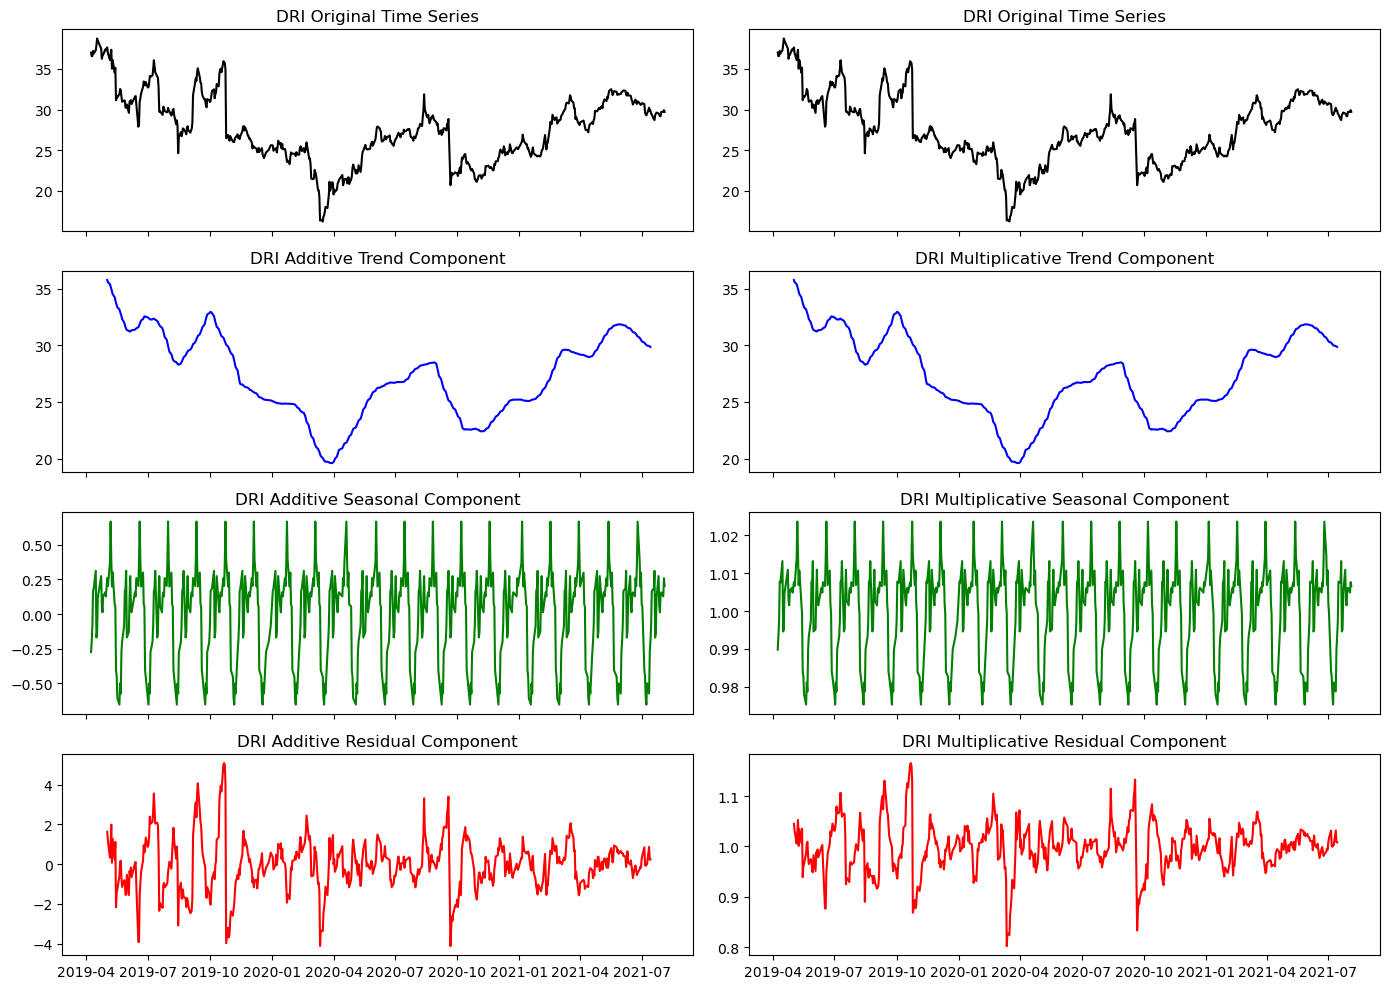

In [31]:
##now do the decomposition for each telekom company
##additive and multiplicative for each vehicle company
# ---  Apply Additive and Multiplicative Decomposition ---
additive_decomposition = seasonal_decompose(dri["Close"], model="additive", period=30)
multiplicative_decomposition = seasonal_decompose(dri["Close"], model="multiplicative", period=30)

# Plot both decompositions side by side
fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)

# Additive Decomposition Plots
axes[0, 0].plot(dri['Date'], dri["Close"], color="black")
axes[0, 0].set_title("DRI Original Time Series")

axes[1, 0].plot(dri['Date'], additive_decomposition.trend, color="blue")
axes[1, 0].set_title("DRI Additive Trend Component")

axes[2, 0].plot(dri['Date'], additive_decomposition.seasonal, color="green")
axes[2, 0].set_title("DRI Additive Seasonal Component")

axes[3, 0].plot(dri['Date'], additive_decomposition.resid, color="red")
axes[3, 0].set_title("DRI Additive Residual Component")

# Multiplicative Decomposition Plots
axes[0, 1].plot(dri['Date'], dri["Close"], color="black")
axes[0, 1].set_title("DRI Original Time Series")

axes[1, 1].plot(dri['Date'], multiplicative_decomposition.trend, color="blue")
axes[1, 1].set_title("DRI Multiplicative Trend Component")

axes[2, 1].plot(dri['Date'], multiplicative_decomposition.seasonal, color="green")
axes[2, 1].set_title("DRI Multiplicative Seasonal Component")

axes[3, 1].plot(dri['Date'], multiplicative_decomposition.resid, color="red")
axes[3, 1].set_title("DRI Multiplicative Residual Component")

plt.tight_layout()
plt.show()

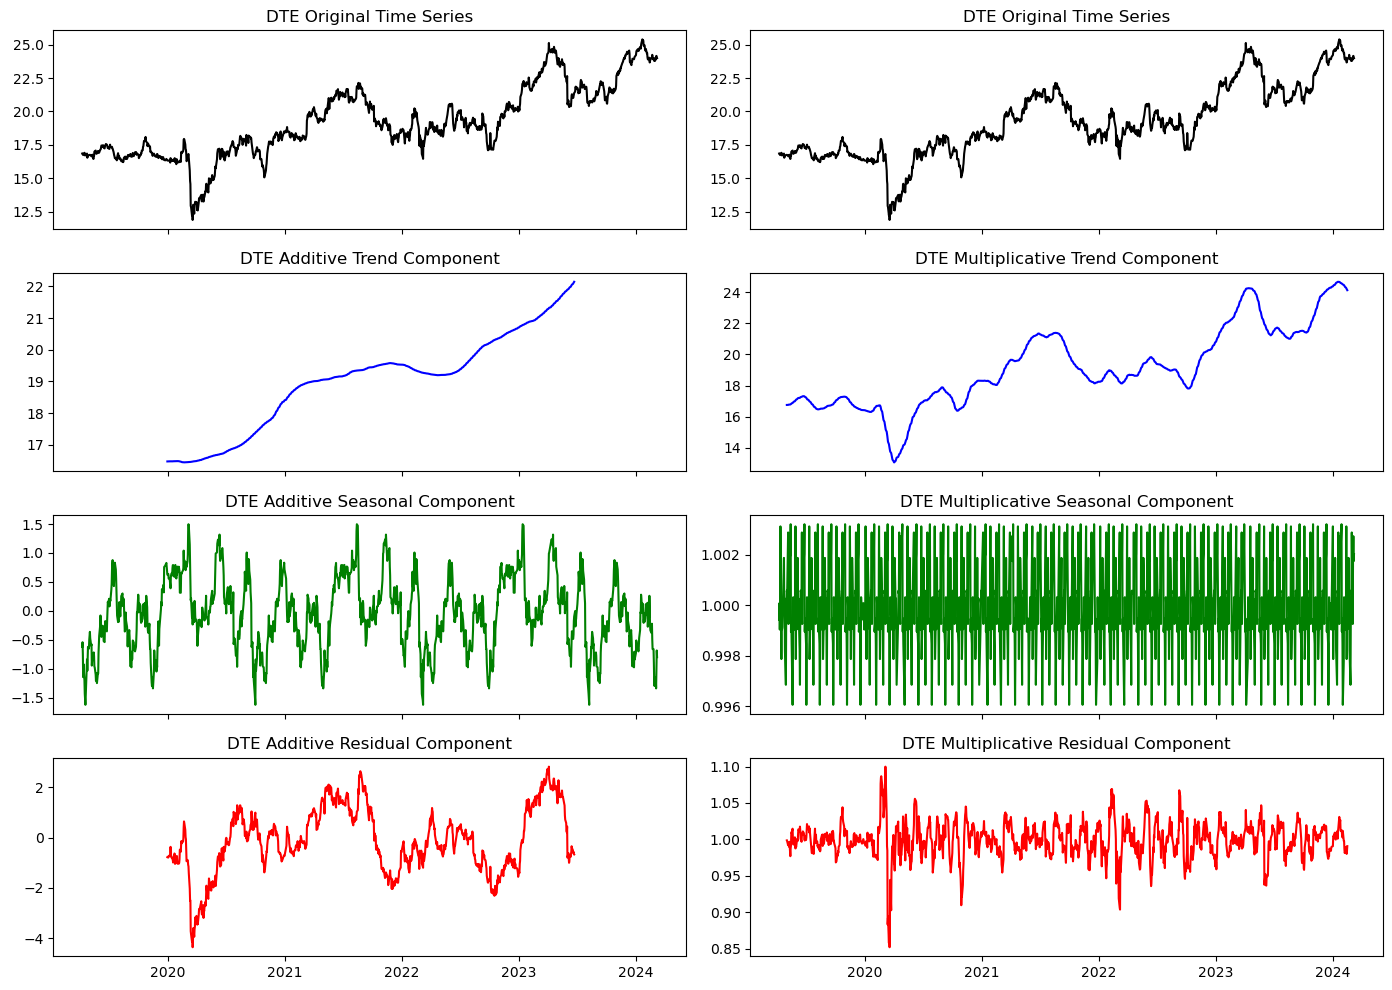

In [35]:
##now do the decomposition for each telekom company
##additive and multiplicative for each vehicle company
# ---  Apply Additive and Multiplicative Decomposition ---
additive_decomposition = seasonal_decompose(dte["Close"], model="additive", period=365)
multiplicative_decomposition = seasonal_decompose(dte["Close"], model="multiplicative", period=30)

# Plot both decompositions side by side
fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)

# Additive Decomposition Plots
axes[0, 0].plot(dte['Date'], dte["Close"], color="black")
axes[0, 0].set_title("DTE Original Time Series")

axes[1, 0].plot(dte['Date'], additive_decomposition.trend, color="blue")
axes[1, 0].set_title("DTE Additive Trend Component")

axes[2, 0].plot(dte['Date'], additive_decomposition.seasonal, color="green")
axes[2, 0].set_title("DTE Additive Seasonal Component")

axes[3, 0].plot(dte['Date'], additive_decomposition.resid, color="red")
axes[3, 0].set_title("DTE Additive Residual Component")

# Multiplicative Decomposition Plots
axes[0, 1].plot(dte['Date'], dte["Close"], color="black")
axes[0, 1].set_title("DTE Original Time Series")

axes[1, 1].plot(dte['Date'], multiplicative_decomposition.trend, color="blue")
axes[1, 1].set_title("DTE Multiplicative Trend Component")

axes[2, 1].plot(dte['Date'], multiplicative_decomposition.seasonal, color="green")
axes[2, 1].set_title("DTE Multiplicative Seasonal Component")

axes[3, 1].plot(dte['Date'], multiplicative_decomposition.resid, color="red")
axes[3, 1].set_title("DTE Multiplicative Residual Component")

plt.tight_layout()
plt.show()